In [ ]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt


In [ ]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

In [ ]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
history = model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_data=(test_images, test_labels))

Epoch 1/5
938/938 [==============================] - 58s 60ms/step - loss: 0.1821 - accuracy: 0.9448 - val_loss: 0.0497 - val_accuracy: 0.9835
Epoch 2/5
938/938 [==============================] - 55s 59ms/step - loss: 0.0500 - accuracy: 0.9845 - val_loss: 0.0438 - val_accuracy: 0.9859
Epoch 3/5
938/938 [==============================] - 56s 60ms/step - loss: 0.0366 - accuracy: 0.9882 - val_loss: 0.0286 - val_accuracy: 0.9907
Epoch 4/5
938/938 [==============================] - 57s 61ms/step - loss: 0.0289 - accuracy: 0.9906 - val_loss: 0.0364 - val_accuracy: 0.9888
Epoch 5/5
938/938 [==============================] - 61s 65ms/step - loss: 0.0216 - accuracy: 0.9933 - val_loss: 0.0312 - val_accuracy: 0.9905


In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Test Accuracy:", test_acc)

313/313 [==============================] - 4s 12ms/step - loss: 0.0312 - accuracy: 0.9905
Test Accuracy: 0.9904999732971191


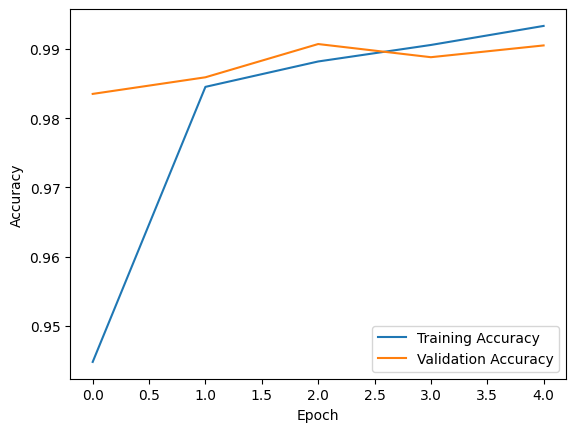

In [ ]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
